Importing Depenedices

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score
warnings.filterwarnings('ignore')


Data collection & Analysis

In [ ]:
# loading the csv data file in to a pandas data frame
parkinsons_data = pd.read_csv('/content/parkinsons.data')

In [ ]:
#print the first five rows of the dataset
parkinsons_data.head(5)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
#print the last firve rows of the dataset
parkinsons_data.tail()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306
194,phon_R01_S50_6,214.289,260.277,77.973,0.00567,0.00003,0.00295,0.00317,0.00885,0.01884,...,0.03078,0.04398,21.209,0,0.462803,0.664357,-5.724056,0.190667,2.555477,0.148569


In [ ]:
# Checking any rows are duplicated or not
print(parkinsons_data.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
190    False
191    False
192    False
193    False
194    False
Length: 195, dtype: bool


In [ ]:
#number of the rows and column have in the dataset
parkinsons_data.shape

(195, 24)

In [ ]:
#getting info about the dataset
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
# check if there any missing value have or not
parkinsons_data.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


<Axes: >

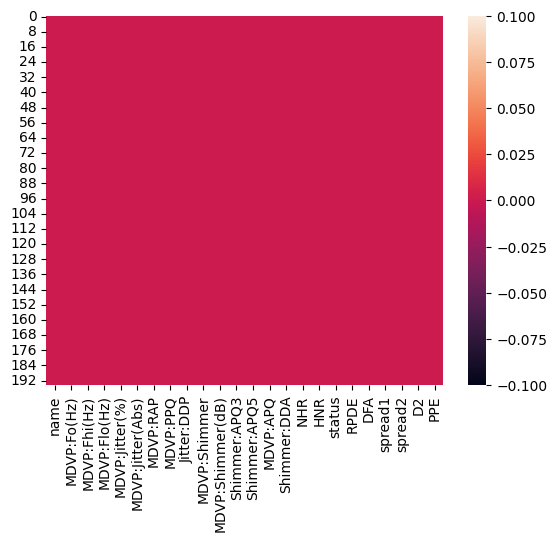

In [ ]:
sns.heatmap(parkinsons_data.isnull(), cbar=True)

In [ ]:
#statistical measures of the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
#checking the distribution of the status value
parkinsons_data['status'].value_counts()

,count
status,
1,147
0,48


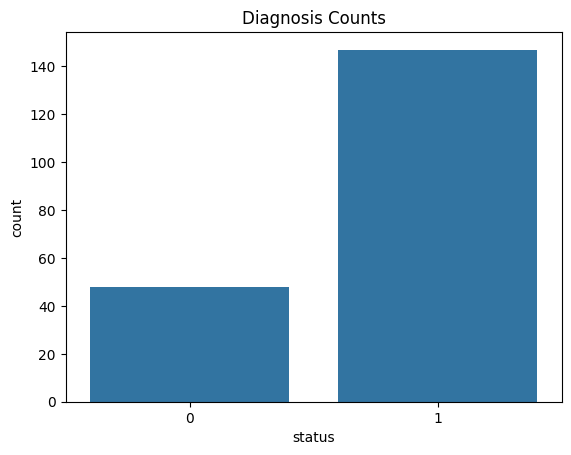

In [ ]:
sns.countplot(x='status', data=parkinsons_data)
plt.title('Diagnosis Counts')
plt.show()

1----> Have parkinsons disease
0----> do not have parkinsons disease


Splitting the features and the status

In [ ]:
X = parkinsons_data.drop(columns=['name','status'],axis=1)
Y = parkinsons_data['status']

In [ ]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [79]:
#Splitiing the data into training data and test data
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [80]:
X.shape, X_train.shape, X_test.shape

((195, 22), (156, 22), (39, 22))

***Model comparison***

In [ ]:
Models = {
    "Logistic Regression" : LogisticRegression(),
    "Support Vector Machine" : SVC(),
    "K-Nearest Neighbors" : KNeighborsClassifier(),
    "Random Forest" : RandomForestClassifier(),
    "AdaBoost" : AdaBoostClassifier(),
    "Gradient Boosting" : GradientBoostingClassifier(),
    "Decision Tree" : DecisionTreeClassifier()
}

for i in range (len(Models)):
  Model = list(Models.values())[i]
  Model.fit(X_train, Y_train)  # Train the model

  #Make Prediction
  Y_train_pred = Model.predict(X_train)
  Y_test_pred = Model.predict(X_test)

  # Training set performance
  Model_train_accuracy = accuracy_score(Y_train, Y_train_pred)*100
  Model_train_f1 = f1_score(Y_train, Y_train_pred,average = "weighted")*100
  Model_train_precision = precision_score(Y_train, Y_train_pred)*100
  Model_train_recall = recall_score(Y_train, Y_train_pred)*100
  Model_train_roc_auc = roc_auc_score(Y_train, Y_train_pred)*100

  # Test set performance
  Model_test_accuracy = accuracy_score(Y_test, Y_test_pred)*100
  Model_test_f1 = f1_score(Y_test, Y_test_pred,average = "weighted")*100
  Model_test_precision = precision_score(Y_test, Y_test_pred)*100
  Model_test_recall = recall_score(Y_test, Y_test_pred)*100
  Model_test_roc_auc = roc_auc_score(Y_test, Y_test_pred)*100

  print(list(Models.keys())[i])

  print("Model performance for Training set")
  print("--Accuracy:{:.4f}".format(Model_train_accuracy))
  print("--F1 Score:{:.4f}".format(Model_train_f1))
  print("--Precision:{:.4f}".format(Model_train_precision))
  print("--Recall:{:.4f}".format(Model_train_recall))
  print("--Roc Auc Score:{:.4f}".format(Model_train_roc_auc))
  print(".............................................")
  print("Model performance for Test set")
  print("--Accuracy:{:.4f}".format(Model_test_accuracy))
  print("--F1 Score:{:.4f}".format(Model_test_f1))
  print("--Precision:{:.4f}".format(Model_test_precision))
  print("--Recall:{:.4f}".format(Model_test_recall))
  print("--Roc Auc Score:{:.4f}".format(Model_test_roc_auc))
  print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, Y_test_pred)}\n")
  print(f"Classification Report :- \n {classification_report(Y_test, Y_test_pred)}")
  print('='*35)
  print('\n')

Logistic Regression
Model performance for Training set
--Accuracy:87.8205
--F1 Score:87.4149
--Precision:89.4309
--Recall:94.8276
--Roc Auc Score:81.1638
.............................................
Model performance for Test set
--Accuracy:87.1795
--F1 Score:85.9961
--Precision:88.2353
--Recall:96.7742
--Roc Auc Score:73.3871
Confusion Matrix :- 
[[ 4  4]
 [ 1 30]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.80      0.50      0.62         8
           1       0.88      0.97      0.92        31

    accuracy                           0.87        39
   macro avg       0.84      0.73      0.77        39
weighted avg       0.87      0.87      0.86        39



Support Vector Machine
Model performance for Training set
--Accuracy:81.4103
--F1 Score:77.1577
--Precision:80.0000
--Recall:100.0000
--Roc Auc Score:63.7500
.............................................
Model performance for Test set
--Accuracy:84.6154
--F1 Score:80.6787


We will apply GridsearchCV method for hyperparameter tuning

In [ ]:
# list of models
models_list = [LogisticRegression(), SVC(), KNeighborsClassifier(), RandomForestClassifier(random_state=0), AdaBoostClassifier(), GradientBoostingClassifier(), DecisionTreeClassifier()]

In [ ]:
#creating a dictionary that contains hyperparameter values for the above mentioned models

model_hyperparameters = {
    'log_reg_hyperparameters': {
        'C' : [1,5,10,20],
        'max_iter' : [1000,5000,10000],
        'penalty':['l1', 'l2', 'elasticnet', None],
        'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
    },
    'svc_hyperparameters': {
        'kernel' : ['linear', 'poly', 'rbf' , 'sigmoid'],
        'C' : [1,5,10,20]
    },
    'KNN_hyperparameters': {
        'n_neighbors' : [3,5,10]
    },
    'random_forest_hyperparameters' : {
        "max_depth" :[5,8,15,None,50,100],
        "max_features" : [5,8,15,None,"auto"],
        "min_samples_split" : [2,8,15,20],
        "n_estimators" : [10, 20,50,100]
    },
    'AdaBoost_hyperparameters' : {
        'n_estimators' : [10, 20,50,100],
        'learning_rate' : [0.001, 0.01, 0.1],
    },
    'GradientBoosting_hyperparameters' : {
        'n_estimators' : [10, 20,50,100],
        'learning_rate' : [0.001, 0.01],
    },
    'DecisionTree_hyperparameters' : {
        'criterion' : ['gini', 'entropy'],
        'splitter' : ['best', 'random']
    }
}


In [ ]:
model_keys = list(model_hyperparameters.keys())
print(model_keys)

['log_reg_hyperparameters', 'svc_hyperparameters', 'KNN_hyperparameters', 'random_forest_hyperparameters', 'AdaBoost_hyperparameters', 'GradientBoosting_hyperparameters', 'DecisionTree_hyperparameters']


In [ ]:
print(model_hyperparameters)

{'log_reg_hyperparameters': {'C': [1, 5, 10, 20], 'max_iter': [1000, 5000, 10000], 'penalty': ['l1', 'l2', 'elasticnet', None], 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}, 'svc_hyperparameters': {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}, 'KNN_hyperparameters': {'n_neighbors': [3, 5, 10]}, 'random_forest_hyperparameters': {'max_depth': [5, 8, 15, None, 50, 100], 'max_features': [5, 8, 15, None, 'auto'], 'min_samples_split': [2, 8, 15, 20], 'n_estimators': [10, 20, 50, 100]}, 'AdaBoost_hyperparameters': {'n_estimators': [10, 20, 50, 100], 'learning_rate': [0.001, 0.01, 0.1]}, 'GradientBoosting_hyperparameters': {'n_estimators': [10, 20, 50, 100], 'learning_rate': [0.001, 0.01]}, 'DecisionTree_hyperparameters': {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random']}}


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def ModelSelection(list_of_models, model_hyperparameters):
  model_param = {}
  i=0
  for model in list_of_models:
    key = model_keys[i]
    params = model_hyperparameters[key]
    i+=1

    classifier = GridSearchCV(model, params, cv=5)
    # fitting the data to classifier
    classifier.fit(X_train,Y_train)
    model_param[model] = classifier.best_params_
  for model_name in model_param:
    print(f"----Best params for {model_name}----")
    print(model_param[model_name])

In [ ]:
ModelSelection(models_list, model_hyperparameters)

----Best params for LogisticRegression()----
{'C': 5, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
----Best params for SVC()----
{'C': 5, 'kernel': 'linear'}
----Best params for KNeighborsClassifier()----
{'n_neighbors': 5}
----Best params for RandomForestClassifier(random_state=0)----
{'max_depth': 5, 'max_features': 15, 'min_samples_split': 2, 'n_estimators': 20}
----Best params for AdaBoostClassifier()----
{'learning_rate': 0.001, 'n_estimators': 10}
----Best params for GradientBoostingClassifier()----
{'learning_rate': 0.01, 'n_estimators': 100}
----Best params for DecisionTreeClassifier()----
{'criterion': 'entropy', 'splitter': 'random'}


Now we will apply best hyperparameters on all models and check evaluation report

In [ ]:
Models = {
    "Logistic Regression" : LogisticRegression(C= 5, max_iter= 1000, penalty= 'l2', solver= 'lbfgs'),
    "Support Vector Machine" : SVC(C= 5, kernel= 'linear'),
    "K-Nearest Neighbors" : KNeighborsClassifier(n_neighbors = 5),
    "AdaBoost" : AdaBoostClassifier(learning_rate= 0.001, n_estimators= 10),
    "Random Forest" : RandomForestClassifier(max_depth= 5, max_features= 15, min_samples_split= 2, n_estimators= 20),
    "Gradient Boosting" : GradientBoostingClassifier(learning_rate = 0.01, n_estimators= 100),
    "Decision Tree" : DecisionTreeClassifier(criterion= 'entropy', splitter= 'random')
}

for i in range (len(Models)):
  Model = list(Models.values())[i]
  Model.fit(X_train, Y_train)  # Train the model

  #Make Prediction
  Y_train_pred = Model.predict(X_train)
  Y_test_pred = Model.predict(X_test)

  # Training set performance
  Model_train_accuracy = accuracy_score(Y_train, Y_train_pred)*100
  Model_train_f1 = f1_score(Y_train, Y_train_pred,average = "weighted")*100
  Model_train_precision = precision_score(Y_train, Y_train_pred)*100
  Model_train_recall = recall_score(Y_train, Y_train_pred)*100
  Model_train_roc_auc = roc_auc_score(Y_train, Y_train_pred)*100

  # Test set performance
  Model_test_accuracy = accuracy_score(Y_test, Y_test_pred)*100
  Model_test_f1 = f1_score(Y_test, Y_test_pred,average = "weighted")*100
  Model_test_precision = precision_score(Y_test, Y_test_pred)*100
  Model_test_recall = recall_score(Y_test, Y_test_pred)*100
  Model_test_roc_auc = roc_auc_score(Y_test, Y_test_pred)*100

  print(list(Models.keys())[i])

  print("Model performance for Training set")
  print("--Accuracy:{:.4f}".format(Model_train_accuracy))
  print("--F1 Score:{:.4f}".format(Model_train_f1))
  print("--Precision:{:.4f}".format(Model_train_precision))
  print("--Recall:{:.4f}".format(Model_train_recall))
  print("--Roc Auc Score:{:.4f}".format(Model_train_roc_auc))
  print(".............................................")
  print("Model performance for Test set")
  print("--Accuracy:{:.4f}".format(Model_test_accuracy))
  print("--F1 Score:{:.4f}".format(Model_test_f1))
  print("--Precision:{:.4f}".format(Model_test_precision))
  print("--Recall:{:.4f}".format(Model_test_recall))
  print("--Roc Auc Score:{:.4f}".format(Model_test_roc_auc))
  print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, Y_test_pred)}\n")
  print(f"Classification Report :- \n {classification_report(Y_test, Y_test_pred)}")
  print('='*35)
  print('\n')

Logistic Regression
Model performance for Training set
--Accuracy:87.8205
--F1 Score:87.4149
--Precision:89.4309
--Recall:94.8276
--Roc Auc Score:81.1638
.............................................
Model performance for Test set
--Accuracy:82.0513
--F1 Score:81.5954
--Precision:87.5000
--Recall:90.3226
--Roc Auc Score:70.1613
Confusion Matrix :- 
[[ 4  4]
 [ 3 28]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.88      0.90      0.89        31

    accuracy                           0.82        39
   macro avg       0.72      0.70      0.71        39
weighted avg       0.81      0.82      0.82        39



Support Vector Machine
Model performance for Training set
--Accuracy:87.8205
--F1 Score:87.2760
--Precision:88.8000
--Recall:95.6897
--Roc Auc Score:80.3448
.............................................
Model performance for Test set
--Accuracy:89.7436
--F1 Score:88.3450
-

Based on Accuracy score, Classification report and Confusion matrix, Support Vector Machine is the best model.

Training the model

In [81]:
classifier = SVC(C= 5, kernel= 'linear')

In [82]:
#training the Logistic Regression
classifier.fit(X_train,Y_train)

SVC(C=5, kernel='linear')

Model evaluation

Accuracy score of training data

In [ ]:
# accuracy score of the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)


In [ ]:
print("Accuracy score of the training data : ", training_data_accuracy)

Accuracy score of the training data :  0.8782051282051282


Accuracy score of test data

In [ ]:
# accuracy score of the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print("Accuracy score of the test data : ", test_data_accuracy)

Accuracy score of the test data :  0.8974358974358975


Confusion matrix and Classification report

Confusion Matrix :- 
[[ 4  4]
 [ 0 31]]



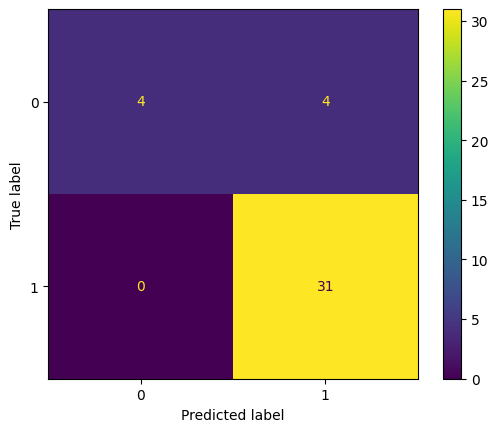

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         8
           1       0.89      1.00      0.94        31

    accuracy                           0.90        39
   macro avg       0.94      0.75      0.80        39
weighted avg       0.91      0.90      0.88        39



In [ ]:
print(f"Confusion Matrix :- \n{confusion_matrix(Y_test, X_test_prediction)}\n")
cm = confusion_matrix(Y_test, X_test_prediction, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()
plt.show()
print(f"Classification Report :- \n {classification_report(Y_test, X_test_prediction)}")

Making Prediction system

In [83]:
input_data =(116.55600,592.03000,86.22800,0.00496,0.00004,0.00254,0.00263,0.00762,0.01660,0.15400,0.00820,0.00972,0.01491,0.02460,0.01397,23.95800,0.566424,0.667654,-6.431119,0.153310,2.161936,0.120605)

#changing the input data as numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print("The person don't have parkinsons disease")
else:
  print("The person have parkinsons disease")



[0]
The person don't have parkinsons disease


Saving the training model

In [59]:
import pickle
filename = 'parkinsons_model.sav'
pickle.dump(classifier, open(filename,'wb'))

In [60]:
#loading the saved model
parkinsons_loaded_model = pickle.load(open('parkinsons_model.sav','rb'))

In [84]:
input_data =(168.77800,232.18100,75.60300,0.00718,0.00004,0.00284,0.00387,0.00853,0.03327,0.34800,0.01441,0.01893,0.03430,0.04322,0.02919,20.37600,0.631099,0.605417,-2.931070,0.434326,3.007463,0.430788)

#changing the input data as numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if(prediction[0] == 0):
  print("The person don't have parkinsons disease")
else:
  print("The person have parkinsons disease")


[1]
The person have parkinsons disease
